<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [128]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt

# Algoritmos

In [129]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)  # Remove a página mais antiga
      molduras.append(pagina)

  return faltas_de_pagina

# def aging(referencias_as_paginas, qtd_molduras):
#     molduras = []  # Lista para armazenar as páginas nas molduras
#     idade_paginas = []  # Lista para armazenar a idade das páginas
#     faltas_de_pagina = 0  # Contador de faltas de página

#     for pagina in referencias_as_paginas:
#         # Envelhece todas as páginas antes de processar a nova referência
#         idade_paginas = [idade >> 1 for idade in idade_paginas]

#         if pagina in molduras:
#             # Atualiza a idade da página existente
#             indice_pagina = molduras.index(pagina)
#             idade_paginas[indice_pagina] |= 1 << (qtd_molduras - 1)  # Define o bit mais significativo como 1 (referência recente)
#         else:
#             # Incrementa o contador de faltas de página
#             faltas_de_pagina += 1

#             if len(molduras) == qtd_molduras:
#                 # Encontra a página com a menor idade
#                 indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
#                 # Substitui a página na moldura
#                 molduras[indice_pagina_a_remover] = pagina
#                 idade_paginas[indice_pagina_a_remover] = 1 << (qtd_molduras - 1)  # Define o bit mais significativo como 1 (nova página)
#             else:
#                 # Adiciona a nova página à lista de molduras
#                 molduras.append(pagina)
#                 idade_paginas.append(1 << (qtd_molduras - 1))  # Define o bit mais significativo como 1 (nova página)
#         print(molduras)

#     return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []  # Lista para armazenar as páginas nas molduras
    idade_paginas = []  # Lista para armazenar a idade das páginas
    faltas_de_pagina = 0  # Contador de faltas de página

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            # print(f"sem falta de pagina: {pagina}")
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1  # Desloca os bits para a direita (envelhecimento)
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)  # Define o bit mais significativo como 1 (referência recente)
        else:
            # print(f"falta de pagina: {pagina}")
            # Incrementa o contador de faltas de página
            faltas_de_pagina += 1

            # Envelhece todas as páginas restantes antes de adicionar a nova
            idade_paginas = [idade >> 1 for idade in idade_paginas]

            if len(molduras) == qtd_molduras: # Se a memoria está cheia
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)  # Define o bit mais significativo como 1 (nova página)
            else: # Se a memoria não está cheia
                # Adiciona a nova página à lista de molduras
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))  # Define o bit mais significativo como 1 (nova página)

        # print(idade_paginas)

    return faltas_de_pagina


In [130]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[981, 967, 945, 931, 920, 903, 890, 867, 845, 826, 813, 801, 788, 777, 766, 746, 731, 722, 706, 694, 684, 668, 654, 643, 634, 606, 594, 590, 565, 547, 537, 531]
[981, 966, 943, 928, 919, 905, 888, 869, 851, 833, 821, 804, 794, 784, 774, 758, 735, 719, 712, 699, 684, 670, 650, 633, 618, 603, 587, 572, 567, 556, 544, 528]


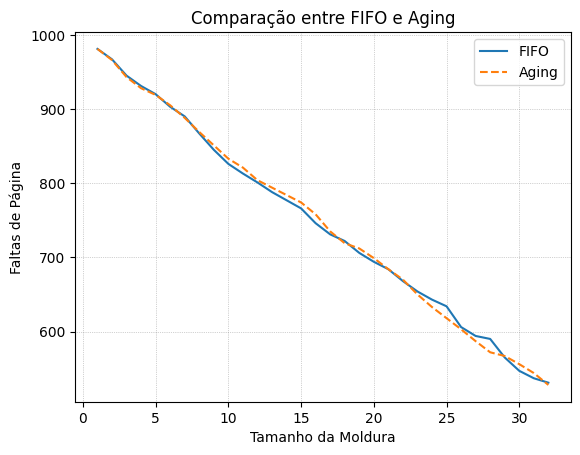

In [131]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Aging com tamanho de contadores com bits diferents para as mesmas referências

In [132]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range, ):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [139]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32

bits_range = [2**i for i in range(1, 8)]

paginas = [i for i in range(qtd_paginas)]
referencias_as_paginas = random.choices(paginas, k=qtd_referencias)

resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)
print(bits_range)
print(resultados)

[2, 4, 8, 16, 32, 64, 128]
[501, 497, 483, 506, 503, 505, 505]


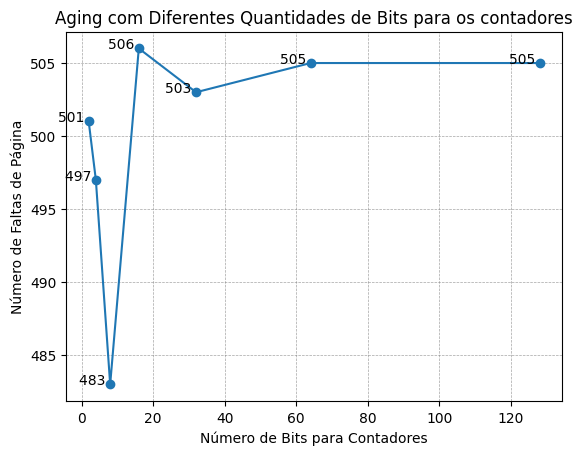

In [140]:
plt.plot(bits_range, resultados, marker='o')

# plotar valores dos y
for x, y in zip(bits_range, resultados):
    plt.text(x, y, f'{y} ', ha='right', va='baseline')

plt.xlabel('Número de Bits para Contadores')
plt.ylabel('Número de Faltas de Página')
plt.title('Aging com Diferentes Quantidades de Bits para os contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()